## Data analysis and cleaning

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [96]:
df = pd.read_csv('weatherAUS.csv')

df[0:5]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [98]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [99]:
df['RISK_MM']

0         0.0
1         0.0
2         0.0
3         1.0
4         0.2
         ... 
142188    0.0
142189    0.0
142190    0.0
142191    0.0
142192    0.0
Name: RISK_MM, Length: 142193, dtype: float64

In [100]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

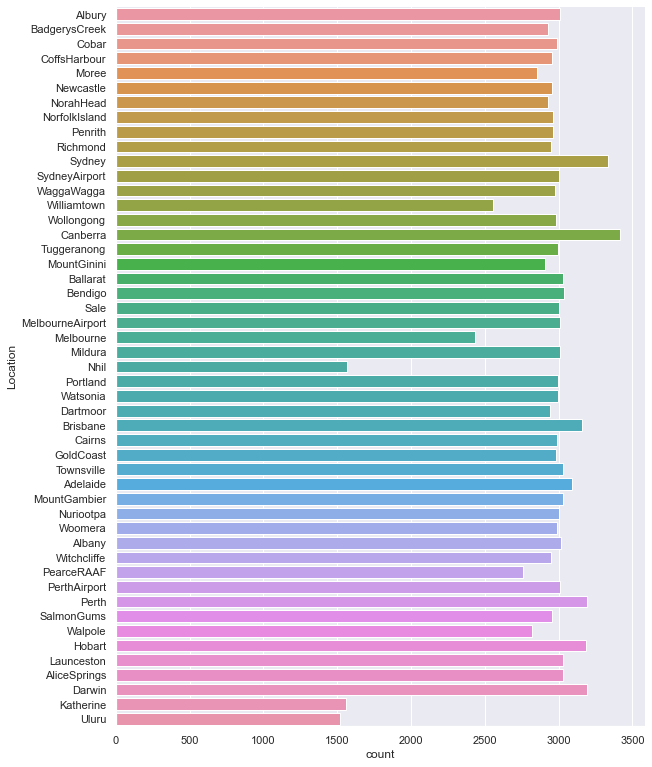

In [101]:
g = sns.catplot(data=df, y='Location', kind='count')
g.fig.set_size_inches(12,12)

In [102]:
df_copy = df.copy()
df_copy.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Date column transformation into 3 columns

In [103]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [104]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [105]:
df_copy['Year'] = df_copy['Date'].dt.year
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Day'] = df_copy['Date']. dt.day
df_copy.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [106]:
df_copy = df_copy.drop('Date', axis=1)

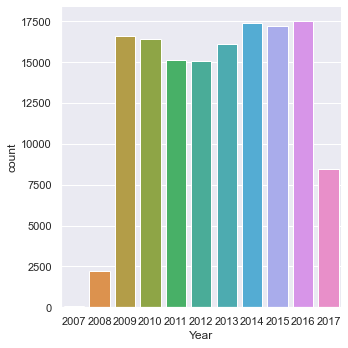

In [107]:
sns.catplot(data=df_copy, x='Year', kind='count')

In [108]:
df_copy[df_copy['Year'] == 2007]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
44351,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,7.0,7.0,14.4,23.6,No,3.6,Yes,2007,11,1
44352,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,5.0,3.0,17.5,25.7,Yes,3.6,Yes,2007,11,2
44353,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,8.0,7.0,15.4,20.2,Yes,39.8,Yes,2007,11,3
44354,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,2.0,7.0,13.5,14.1,Yes,2.8,Yes,2007,11,4
44355,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,7.0,7.0,11.1,15.4,Yes,0.0,No,2007,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44407,Canberra,14.3,26.7,0.0,7.2,7.1,NNW,65.0,N,NNW,...,7.0,7.0,19.8,19.0,No,14.4,Yes,2007,12,27
44408,Canberra,15.1,28.3,14.4,8.8,13.2,NNW,28.0,NNW,NW,...,1.0,5.0,18.3,27.4,Yes,0.0,No,2007,12,28
44409,Canberra,14.4,31.6,0.0,6.6,13.6,NNW,30.0,NW,N,...,0.0,2.0,21.5,30.3,No,0.0,No,2007,12,29
44410,Canberra,15.4,35.0,0.0,9.6,13.0,E,39.0,SSW,ESE,...,1.0,1.0,23.4,34.3,No,0.0,No,2007,12,30


### Dropping data from 2007

In [109]:
df_copy = df_copy.drop(df_copy[df_copy['Year'] == 2007].index)
df_copy[df_copy['Year'] == 2007]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day


In [110]:
df_copy[df_copy['Year'] == 2008]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136100,Darwin,25.9,34.4,3.0,4.8,7.7,NE,33.0,SSW,W,...,5.0,7.0,29.4,32.8,Yes,12.4,Yes,2008,12,27
136101,Darwin,23.6,32.6,12.4,5.6,4.0,WSW,37.0,WSW,W,...,4.0,7.0,30.6,31.1,Yes,0.0,No,2008,12,28
136102,Darwin,27.4,31.3,0.0,4.0,1.1,S,54.0,WSW,S,...,7.0,8.0,30.1,23.7,No,22.2,Yes,2008,12,29
136103,Darwin,23.4,29.3,22.2,3.8,0.1,WNW,50.0,WNW,WSW,...,7.0,7.0,26.7,29.3,Yes,14.6,Yes,2008,12,30


### Dropping data from 2008

In [111]:
df_copy = df_copy.drop(df_copy[df_copy['Year'] == 2008].index)
df_copy[df_copy['Year'] == 2008]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day


In [112]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139886 entries, 30 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       139886 non-null  object 
 1   MinTemp        139258 non-null  float64
 2   MaxTemp        139568 non-null  float64
 3   Rainfall       138497 non-null  float64
 4   Evaporation    79368 non-null   float64
 5   Sunshine       72388 non-null   float64
 6   WindGustDir    131003 non-null  object 
 7   WindGustSpeed  131062 non-null  float64
 8   WindDir9am     129963 non-null  object 
 9   WindDir3pm     136127 non-null  object 
 10  WindSpeed9am   138566 non-null  float64
 11  WindSpeed3pm   137272 non-null  float64
 12  Humidity9am    138135 non-null  float64
 13  Humidity3pm    136296 non-null  float64
 14  Pressure9am    125966 non-null  float64
 15  Pressure3pm    125998 non-null  float64
 16  Cloud9am       86585 non-null   float64
 17  Cloud3pm       83158 non-nul

### MinTemp

In [113]:
df_copy.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
count,139258.000000,139568.000000,138497.000000,79368.000000,72388.000000,131062.000000,138566.000000,137272.000000,138135.000000,136296.000000,125966.000000,125998.000000,86585.000000,83158.000000,138999.000000,137173.000000,139886.000000,139886.000000,139886.000000,139886.000000
mean,12.181598,23.230966,2.350291,5.476789,7.619687,39.960576,14.003082,18.625211,68.898035,51.520859,1017.684261,1015.289770,4.440215,4.507504,16.987592,21.691626,2.361672,2012.837847,6.355990,15.712330
std,6.401637,7.126232,8.486115,4.213676,3.784846,13.588691,8.900551,8.811182,19.088233,20.831449,7.086493,7.021147,2.889066,2.722859,6.491650,6.945068,8.499548,2.485994,3.415266,8.797364
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2009.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


<AxesSubplot:xlabel='MinTemp', ylabel='Count'>

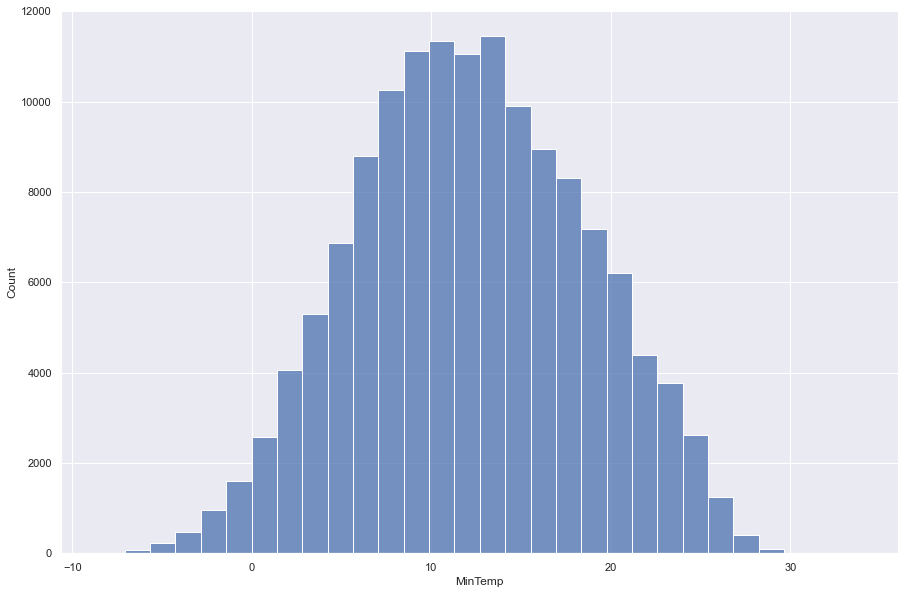

In [114]:
sns.histplot(data=df_copy, x='MinTemp', bins=30)

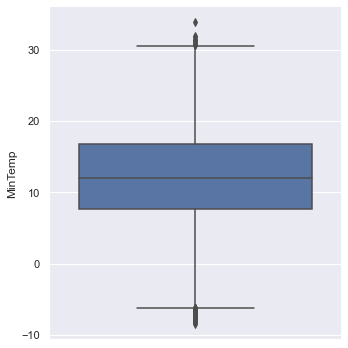

In [115]:
sns.catplot(data=df_copy, y='MinTemp', kind='box')

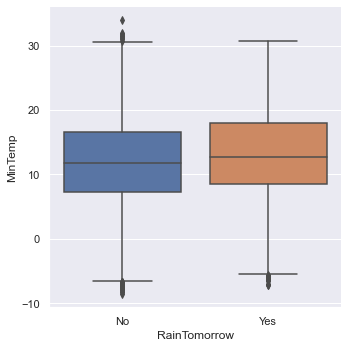

In [116]:
sns.catplot(data=df_copy,x='RainTomorrow', y='MinTemp', kind='box')

### Dropping missing values

In [117]:
df_copy = df_copy.dropna(subset='MinTemp')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139258 entries, 30 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       139258 non-null  object 
 1   MinTemp        139258 non-null  float64
 2   MaxTemp        139028 non-null  float64
 3   Rainfall       138034 non-null  float64
 4   Evaporation    79263 non-null   float64
 5   Sunshine       72294 non-null   float64
 6   WindGustDir    130782 non-null  object 
 7   WindGustSpeed  130839 non-null  float64
 8   WindDir9am     129714 non-null  object 
 9   WindDir3pm     135787 non-null  object 
 10  WindSpeed9am   138246 non-null  float64
 11  WindSpeed3pm   136904 non-null  float64
 12  Humidity9am    137862 non-null  float64
 13  Humidity3pm    135967 non-null  float64
 14  Pressure9am    125737 non-null  float64
 15  Pressure3pm    125749 non-null  float64
 16  Cloud9am       86364 non-null   float64
 17  Cloud3pm       82935 non-nul

### MaxTemp

<AxesSubplot:xlabel='MaxTemp', ylabel='Count'>

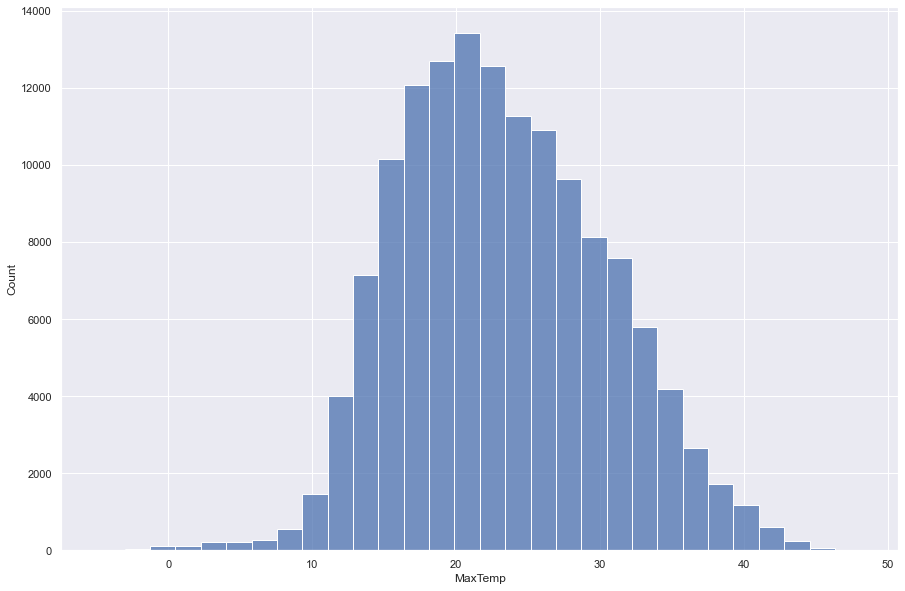

In [118]:
sns.histplot(data=df_copy, x='MaxTemp', bins=30)

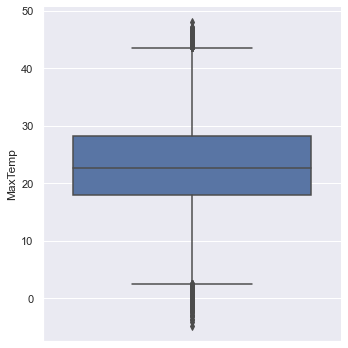

In [119]:
sns.catplot(data=df_copy, y='MaxTemp', kind='box')

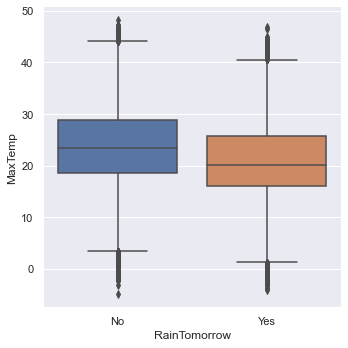

In [120]:
sns.catplot(data=df_copy, x='RainTomorrow',y='MaxTemp', kind='box')

### Dropping missing values

In [121]:
df_copy = df_copy.dropna(subset='MaxTemp')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139028 entries, 30 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       139028 non-null  object 
 1   MinTemp        139028 non-null  float64
 2   MaxTemp        139028 non-null  float64
 3   Rainfall       137804 non-null  float64
 4   Evaporation    79203 non-null   float64
 5   Sunshine       72257 non-null   float64
 6   WindGustDir    130745 non-null  object 
 7   WindGustSpeed  130802 non-null  float64
 8   WindDir9am     129550 non-null  object 
 9   WindDir3pm     135660 non-null  object 
 10  WindSpeed9am   138025 non-null  float64
 11  WindSpeed3pm   136765 non-null  float64
 12  Humidity9am    137645 non-null  float64
 13  Humidity3pm    135847 non-null  float64
 14  Pressure9am    125631 non-null  float64
 15  Pressure3pm    125647 non-null  float64
 16  Cloud9am       86175 non-null   float64
 17  Cloud3pm       82836 non-nul

### Rainfall

In [122]:
df_copy.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
count,139028.000000,139028.000000,137804.000000,79203.000000,72257.000000,130802.000000,138025.000000,136765.000000,137645.000000,135847.000000,125631.00000,125647.000000,86175.000000,82836.000000,138498.000000,136712.000000,139028.000000,139028.000000,139028.000000,139028.000000
mean,12.180065,23.231515,2.344676,5.475485,7.619137,39.958869,14.015222,18.637502,68.883040,51.508153,1017.68582,1015.291927,4.439930,4.507412,16.986168,21.691029,2.354113,2012.838313,6.358014,15.715093
std,6.401752,7.122875,8.439592,4.213826,3.784955,13.588626,8.893001,8.804739,19.092048,20.830527,7.08664,7.020778,2.888954,2.722923,6.493426,6.942628,8.460773,2.483132,3.415461,8.798441
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2009.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.00000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.70000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


<AxesSubplot:xlabel='Rainfall', ylabel='Count'>

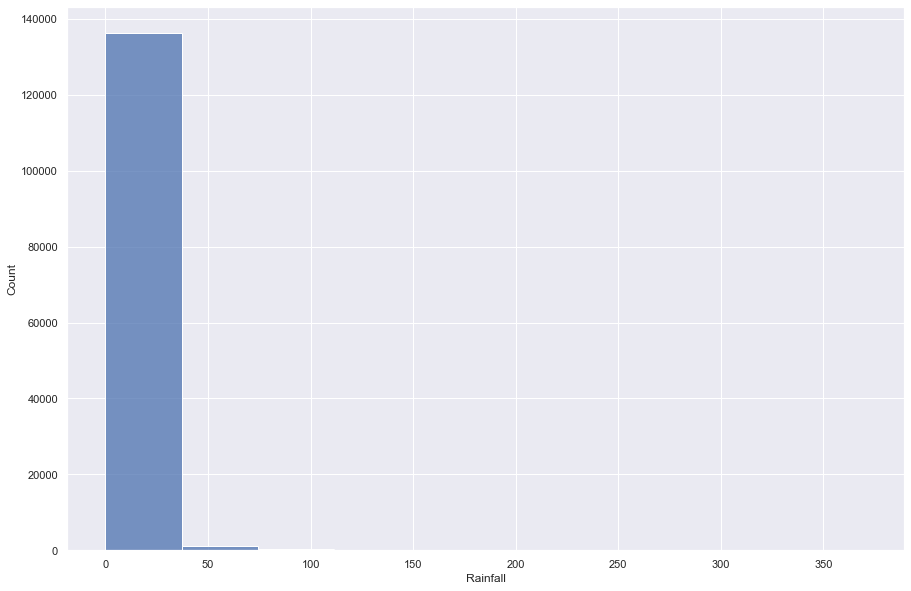

In [123]:
sns.histplot(data=df_copy, x='Rainfall', bins=10)

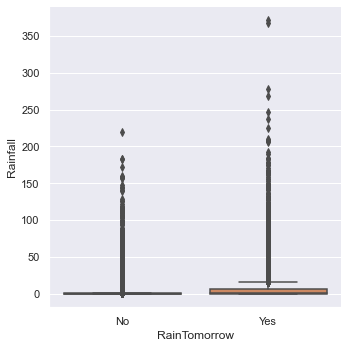

In [124]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Rainfall', kind='box')

### Dropping missing values

In [125]:
df_copy = df_copy.dropna(subset='Rainfall')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137804 entries, 30 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       137804 non-null  object 
 1   MinTemp        137804 non-null  float64
 2   MaxTemp        137804 non-null  float64
 3   Rainfall       137804 non-null  float64
 4   Evaporation    78966 non-null   float64
 5   Sunshine       71893 non-null   float64
 6   WindGustDir    129629 non-null  object 
 7   WindGustSpeed  129684 non-null  float64
 8   WindDir9am     128566 non-null  object 
 9   WindDir3pm     134484 non-null  object 
 10  WindSpeed9am   136984 non-null  float64
 11  WindSpeed3pm   135581 non-null  float64
 12  Humidity9am    136556 non-null  float64
 13  Humidity3pm    134659 non-null  float64
 14  Pressure9am    124586 non-null  float64
 15  Pressure3pm    124555 non-null  float64
 16  Cloud9am       85817 non-null   float64
 17  Cloud3pm       82460 non-nul

### Dropping Evaporation

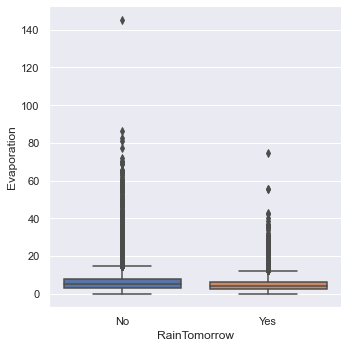

In [126]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Evaporation', kind='box')

In [127]:
df_copy = df_copy.drop('Evaporation', axis=1)
df_copy.head()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
30,Albury,11.3,26.5,0.0,NaN,WNW,56.0,W,WNW,19.0,...,NaN,NaN,19.7,25.7,No,0.0,No,2009,1,1
31,Albury,9.6,23.9,0.0,NaN,W,41.0,WSW,SSW,19.0,...,NaN,NaN,14.9,22.1,No,0.0,No,2009,1,2
32,Albury,10.5,28.8,0.0,NaN,SSE,26.0,SSE,E,11.0,...,NaN,NaN,17.1,26.5,No,0.0,No,2009,1,3
33,Albury,12.3,34.6,0.0,NaN,WNW,37.0,SSE,NW,6.0,...,NaN,NaN,20.7,33.9,No,0.0,No,2009,1,4
34,Albury,12.9,35.8,0.0,NaN,WNW,41.0,ENE,NW,6.0,...,NaN,NaN,22.4,34.4,No,0.0,No,2009,1,5


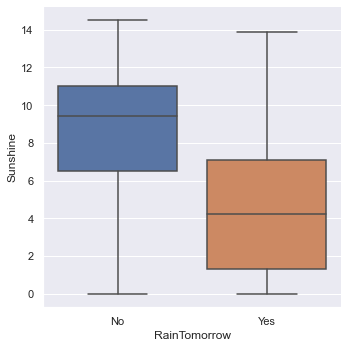

In [128]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Sunshine', kind='box')

### WindGustDir 

In [129]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137804 entries, 30 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       137804 non-null  object 
 1   MinTemp        137804 non-null  float64
 2   MaxTemp        137804 non-null  float64
 3   Rainfall       137804 non-null  float64
 4   Sunshine       71893 non-null   float64
 5   WindGustDir    129629 non-null  object 
 6   WindGustSpeed  129684 non-null  float64
 7   WindDir9am     128566 non-null  object 
 8   WindDir3pm     134484 non-null  object 
 9   WindSpeed9am   136984 non-null  float64
 10  WindSpeed3pm   135581 non-null  float64
 11  Humidity9am    136556 non-null  float64
 12  Humidity3pm    134659 non-null  float64
 13  Pressure9am    124586 non-null  float64
 14  Pressure3pm    124555 non-null  float64
 15  Cloud9am       85817 non-null   float64
 16  Cloud3pm       82460 non-null   float64
 17  Temp9am        137400 non-nu

In [130]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

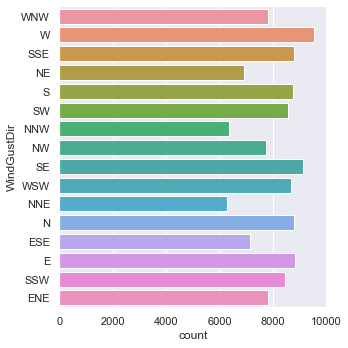

In [131]:
sns.catplot(data=df_copy, y='WindGustDir', kind='count')

### Dropping missing values

In [132]:
df_copy = df_copy.dropna(subset='WindGustDir')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129629 entries, 30 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       129629 non-null  object 
 1   MinTemp        129629 non-null  float64
 2   MaxTemp        129629 non-null  float64
 3   Rainfall       129629 non-null  float64
 4   Sunshine       67999 non-null   float64
 5   WindGustDir    129629 non-null  object 
 6   WindGustSpeed  129629 non-null  float64
 7   WindDir9am     122463 non-null  object 
 8   WindDir3pm     128734 non-null  object 
 9   WindSpeed9am   129550 non-null  float64
 10  WindSpeed3pm   129405 non-null  float64
 11  Humidity9am    128505 non-null  float64
 12  Humidity3pm    127886 non-null  float64
 13  Pressure9am    119643 non-null  float64
 14  Pressure3pm    119625 non-null  float64
 15  Cloud9am       78744 non-null   float64
 16  Cloud3pm       76664 non-null   float64
 17  Temp9am        129283 non-nu

### WindGustSpeed

In [133]:
df_copy.describe()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
count,129629.000000,129629.000000,129629.000000,67999.000000,129629.000000,129550.000000,129405.000000,128505.000000,127886.000000,119643.000000,119625.000000,78744.000000,76664.000000,129283.000000,128686.000000,129629.000000,129629.000000,129629.000000,129629.000000
mean,12.127987,23.296362,2.321581,7.665038,39.945552,14.179822,18.730706,68.646029,51.102513,1017.668456,1015.258836,4.422140,4.501474,16.977406,21.748164,2.286279,2012.866318,6.356556,15.720001
std,6.467993,7.207594,8.405625,3.787457,13.578558,8.767109,8.674673,19.295203,20.907987,7.081115,7.013913,2.889634,2.725180,6.572778,7.013953,8.327436,2.476682,3.414558,8.796006
min,-8.500000,-4.800000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2009.000000,1.000000,1.000000
25%,7.500000,17.900000,0.000000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.000000,1010.500000,1.000000,2.000000,12.200000,16.600000,0.000000,2011.000000,3.000000,8.000000
50%,11.900000,22.800000,0.000000,8.500000,39.000000,13.000000,19.000000,70.000000,51.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.200000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.400000,0.600000,10.700000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.600000,0.600000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,367.600000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


<AxesSubplot:xlabel='WindGustSpeed', ylabel='Count'>

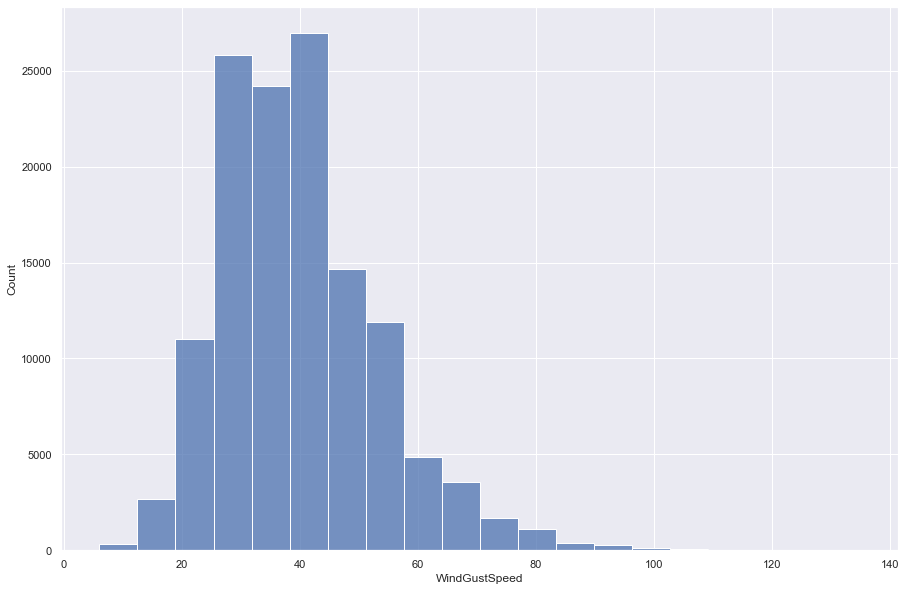

In [134]:
sns.histplot(data=df_copy, x='WindGustSpeed', bins=20)

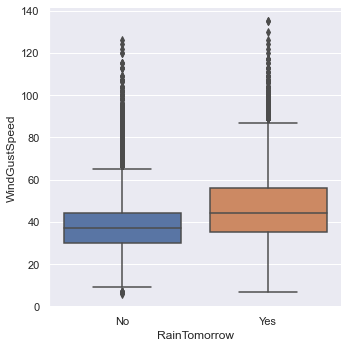

In [135]:
sns.catplot(data=df_copy, x='RainTomorrow', y='WindGustSpeed', kind='box')

In [136]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129629 entries, 30 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       129629 non-null  object 
 1   MinTemp        129629 non-null  float64
 2   MaxTemp        129629 non-null  float64
 3   Rainfall       129629 non-null  float64
 4   Sunshine       67999 non-null   float64
 5   WindGustDir    129629 non-null  object 
 6   WindGustSpeed  129629 non-null  float64
 7   WindDir9am     122463 non-null  object 
 8   WindDir3pm     128734 non-null  object 
 9   WindSpeed9am   129550 non-null  float64
 10  WindSpeed3pm   129405 non-null  float64
 11  Humidity9am    128505 non-null  float64
 12  Humidity3pm    127886 non-null  float64
 13  Pressure9am    119643 non-null  float64
 14  Pressure3pm    119625 non-null  float64
 15  Cloud9am       78744 non-null   float64
 16  Cloud3pm       76664 non-null   float64
 17  Temp9am        129283 non-nu

### WindDir 9am/3pm

In [137]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [138]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

### Dropping missing values

In [139]:
df_copy = df_copy.dropna(subset=['WindDir9am', 'WindDir3pm'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121802 entries, 30 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       121802 non-null  object 
 1   MinTemp        121802 non-null  float64
 2   MaxTemp        121802 non-null  float64
 3   Rainfall       121802 non-null  float64
 4   Sunshine       65513 non-null   float64
 5   WindGustDir    121802 non-null  object 
 6   WindGustSpeed  121802 non-null  float64
 7   WindDir9am     121802 non-null  object 
 8   WindDir3pm     121802 non-null  object 
 9   WindSpeed9am   121802 non-null  float64
 10  WindSpeed3pm   121802 non-null  float64
 11  Humidity9am    120828 non-null  float64
 12  Humidity3pm    120326 non-null  float64
 13  Pressure9am    112719 non-null  float64
 14  Pressure3pm    112768 non-null  float64
 15  Cloud9am       75925 non-null   float64
 16  Cloud3pm       73945 non-null   float64
 17  Temp9am        121489 non-nu

### WindSpeed 9am/3pm

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Count'>

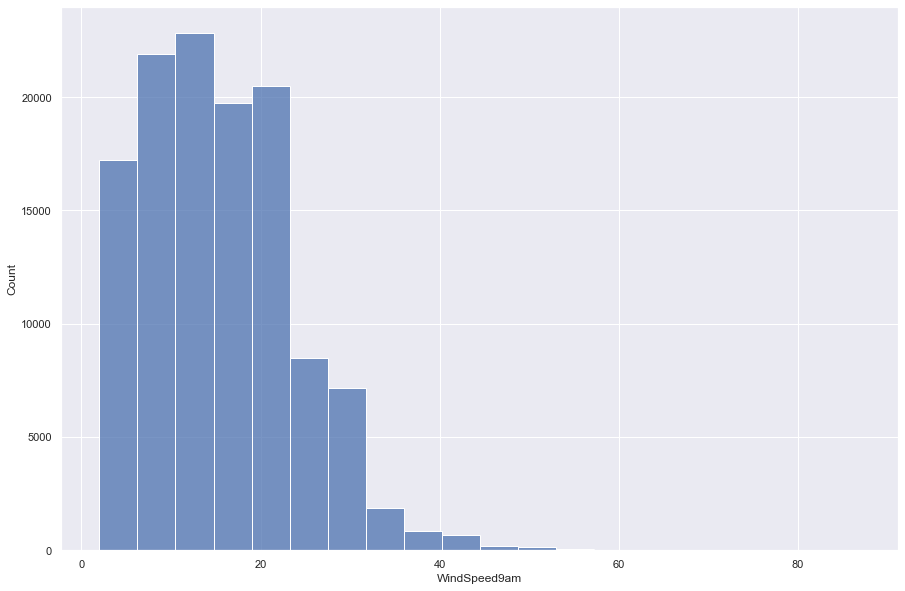

In [140]:
sns.histplot(data=df_copy, x='WindSpeed9am', bins=20)

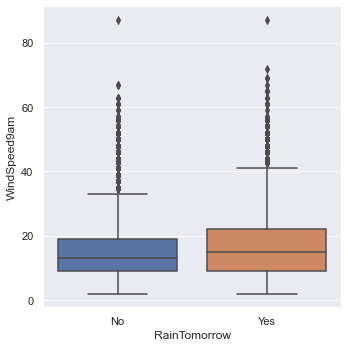

In [141]:
sns.catplot(data=df_copy, x='RainTomorrow', y='WindSpeed9am', kind='box')

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Count'>

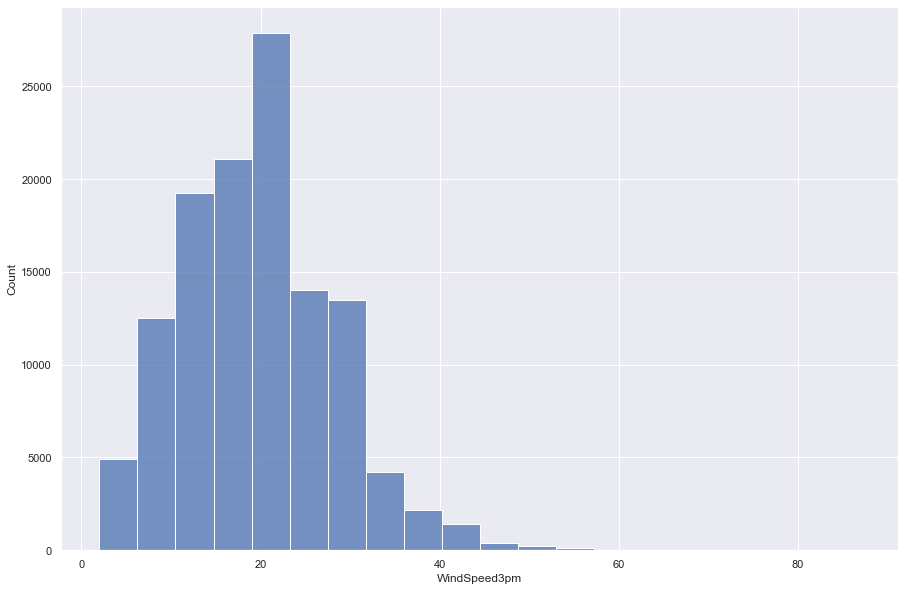

In [142]:
sns.histplot(data=df_copy, x='WindSpeed3pm', bins=20)

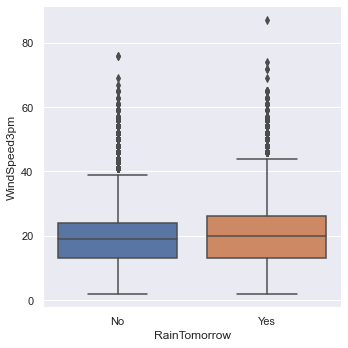

In [143]:
sns.catplot(data=df_copy, x='RainTomorrow', y='WindSpeed3pm', kind='box')

### Humidity 3pm/9am

<AxesSubplot:xlabel='Humidity9am', ylabel='Count'>

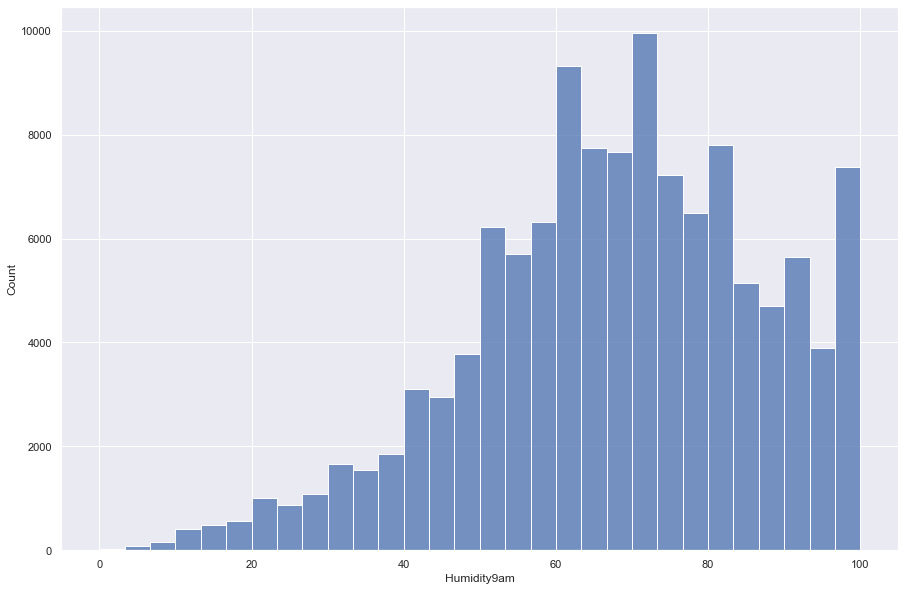

In [144]:
sns.histplot(data=df_copy, x='Humidity9am', bins=30)

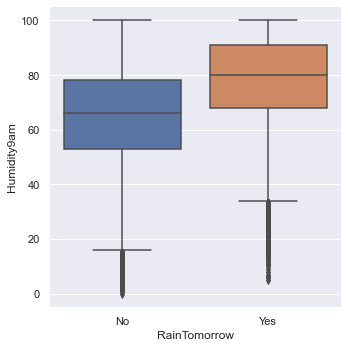

In [145]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Humidity9am', kind='box')

<AxesSubplot:xlabel='Humidity3pm', ylabel='Count'>

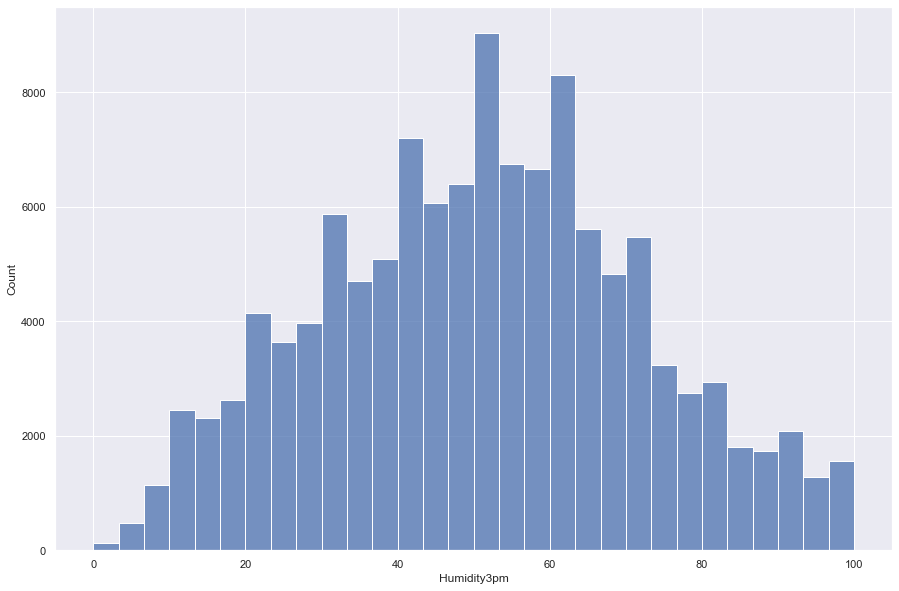

In [146]:
sns.histplot(data=df_copy, x='Humidity3pm', bins=30)

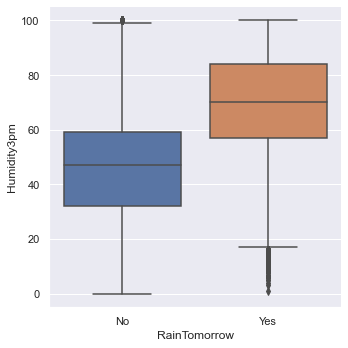

In [147]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Humidity3pm', kind='box')

### Dropping missing values

In [148]:
df_copy = df_copy.dropna(subset=['Humidity9am', 'Humidity3pm'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120016 entries, 30 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       120016 non-null  object 
 1   MinTemp        120016 non-null  float64
 2   MaxTemp        120016 non-null  float64
 3   Rainfall       120016 non-null  float64
 4   Sunshine       65193 non-null   float64
 5   WindGustDir    120016 non-null  object 
 6   WindGustSpeed  120016 non-null  float64
 7   WindDir9am     120016 non-null  object 
 8   WindDir3pm     120016 non-null  object 
 9   WindSpeed9am   120016 non-null  float64
 10  WindSpeed3pm   120016 non-null  float64
 11  Humidity9am    120016 non-null  float64
 12  Humidity3pm    120016 non-null  float64
 13  Pressure9am    111214 non-null  float64
 14  Pressure3pm    111265 non-null  float64
 15  Cloud9am       74916 non-null   float64
 16  Cloud3pm       73581 non-null   float64
 17  Temp9am        120016 non-nu

### Pressure

In [149]:
df_copy.describe()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
count,120016.000000,120016.000000,120016.000000,65193.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000,111214.000000,111265.000000,74916.000000,73581.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000
mean,12.391379,23.443086,2.357949,7.719544,40.668528,15.041653,19.201648,67.742018,50.854436,1017.458572,1015.084683,4.424195,4.496514,17.219990,21.914747,2.310338,2012.859652,6.387990,15.713280
std,6.329952,7.145401,8.502443,3.780566,13.388251,8.318630,8.590975,19.090525,20.972111,7.012767,6.941722,2.878501,2.720869,6.449757,7.010703,8.428753,2.476476,3.468515,8.787941
min,-8.500000,-4.800000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2009.000000,1.000000,1.000000
25%,7.800000,18.100000,0.000000,5.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.400000,1.000000,2.000000,12.500000,16.800000,0.000000,2011.000000,3.000000,8.000000
50%,12.200000,23.000000,0.000000,8.600000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.500000,1015.100000,5.000000,5.000000,16.900000,21.400000,0.000000,2013.000000,6.000000,16.000000
75%,17.000000,28.500000,0.800000,10.700000,48.000000,20.000000,24.000000,82.000000,65.000000,1022.100000,1019.800000,7.000000,7.000000,21.800000,26.800000,0.600000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,367.600000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


<AxesSubplot:xlabel='Pressure9am', ylabel='Count'>

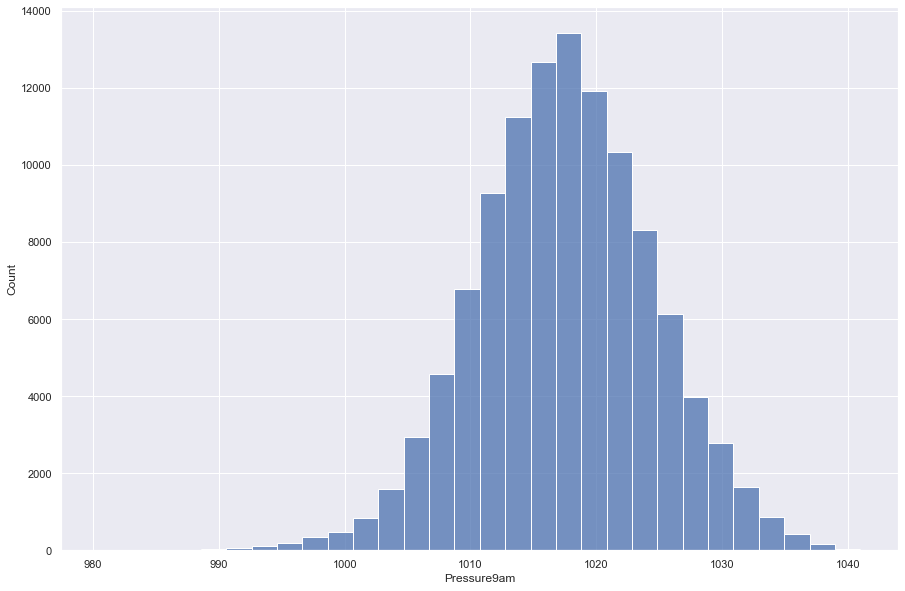

In [150]:
sns.histplot(data=df_copy, x='Pressure9am', bins=30)

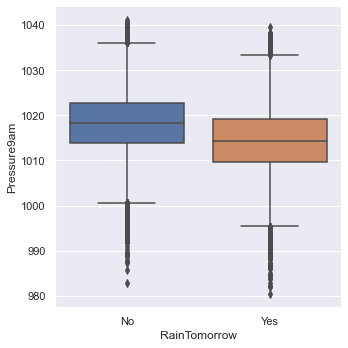

In [151]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Pressure9am', kind='box')

<AxesSubplot:xlabel='Pressure3pm', ylabel='Count'>

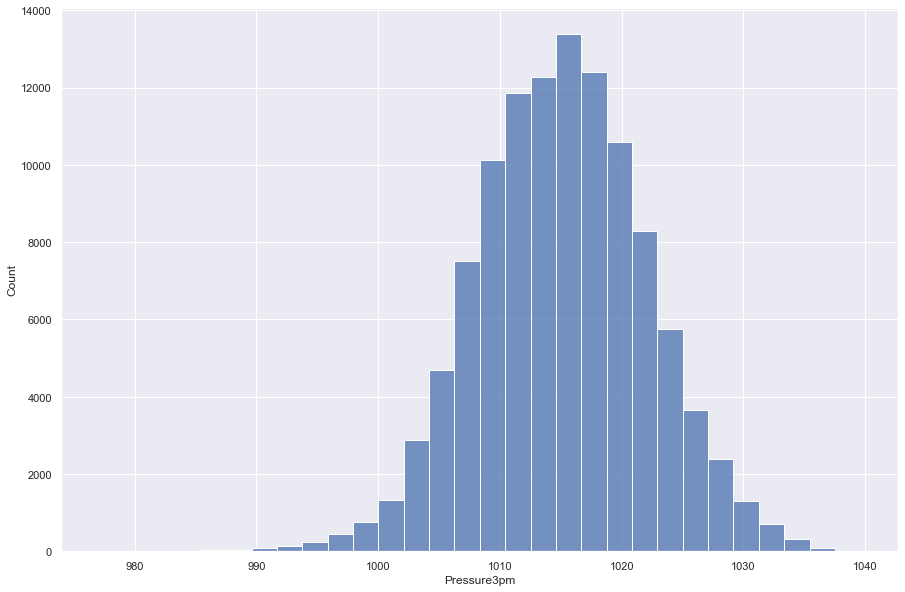

In [152]:
sns.histplot(data=df_copy, x='Pressure3pm', bins=30)

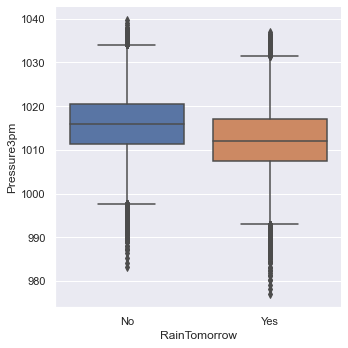

In [153]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Pressure3pm', kind='box')

In [154]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120016 entries, 30 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       120016 non-null  object 
 1   MinTemp        120016 non-null  float64
 2   MaxTemp        120016 non-null  float64
 3   Rainfall       120016 non-null  float64
 4   Sunshine       65193 non-null   float64
 5   WindGustDir    120016 non-null  object 
 6   WindGustSpeed  120016 non-null  float64
 7   WindDir9am     120016 non-null  object 
 8   WindDir3pm     120016 non-null  object 
 9   WindSpeed9am   120016 non-null  float64
 10  WindSpeed3pm   120016 non-null  float64
 11  Humidity9am    120016 non-null  float64
 12  Humidity3pm    120016 non-null  float64
 13  Pressure9am    111214 non-null  float64
 14  Pressure3pm    111265 non-null  float64
 15  Cloud9am       74916 non-null   float64
 16  Cloud3pm       73581 non-null   float64
 17  Temp9am        120016 non-nu

### Filling missing values with their means

In [155]:
press_9 = np.mean(df_copy['Pressure9am'])
press_3 = np.mean(df_copy['Pressure3pm'])

In [156]:
df_copy['Pressure9am'] = df_copy['Pressure9am'].fillna(press_9)

C:\Users\48666\AppData\Local\Temp\ipykernel_4588\4221018152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Pressure9am'] = df_copy['Pressure9am'].fillna(press_9)


In [157]:
df_copy['Pressure3pm'] = df_copy['Pressure3pm'].fillna(press_3)

C:\Users\48666\AppData\Local\Temp\ipykernel_4588\505931456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Pressure3pm'] = df_copy['Pressure3pm'].fillna(press_3)


In [158]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120016 entries, 30 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       120016 non-null  object 
 1   MinTemp        120016 non-null  float64
 2   MaxTemp        120016 non-null  float64
 3   Rainfall       120016 non-null  float64
 4   Sunshine       65193 non-null   float64
 5   WindGustDir    120016 non-null  object 
 6   WindGustSpeed  120016 non-null  float64
 7   WindDir9am     120016 non-null  object 
 8   WindDir3pm     120016 non-null  object 
 9   WindSpeed9am   120016 non-null  float64
 10  WindSpeed3pm   120016 non-null  float64
 11  Humidity9am    120016 non-null  float64
 12  Humidity3pm    120016 non-null  float64
 13  Pressure9am    120016 non-null  float64
 14  Pressure3pm    120016 non-null  float64
 15  Cloud9am       74916 non-null   float64
 16  Cloud3pm       73581 non-null   float64
 17  Temp9am        120016 non-nu

### Cloud 3am/9pm

In [159]:
df_copy.describe()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
count,120016.000000,120016.000000,120016.000000,65193.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000,74916.000000,73581.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000
mean,12.391379,23.443086,2.357949,7.719544,40.668528,15.041653,19.201648,67.742018,50.854436,1017.458572,1015.084683,4.424195,4.496514,17.219990,21.914747,2.310338,2012.859652,6.387990,15.713280
std,6.329952,7.145401,8.502443,3.780566,13.388251,8.318630,8.590975,19.090525,20.972111,6.750710,6.683852,2.878501,2.720869,6.449757,7.010703,8.428753,2.476476,3.468515,8.787941
min,-8.500000,-4.800000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2009.000000,1.000000,1.000000
25%,7.800000,18.100000,0.000000,5.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1013.300000,1010.800000,1.000000,2.000000,12.500000,16.800000,0.000000,2011.000000,3.000000,8.000000
50%,12.200000,23.000000,0.000000,8.600000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.458572,1015.084683,5.000000,5.000000,16.900000,21.400000,0.000000,2013.000000,6.000000,16.000000
75%,17.000000,28.500000,0.800000,10.700000,48.000000,20.000000,24.000000,82.000000,65.000000,1021.700000,1019.300000,7.000000,7.000000,21.800000,26.800000,0.600000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,367.600000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


<AxesSubplot:xlabel='Cloud9am', ylabel='Count'>

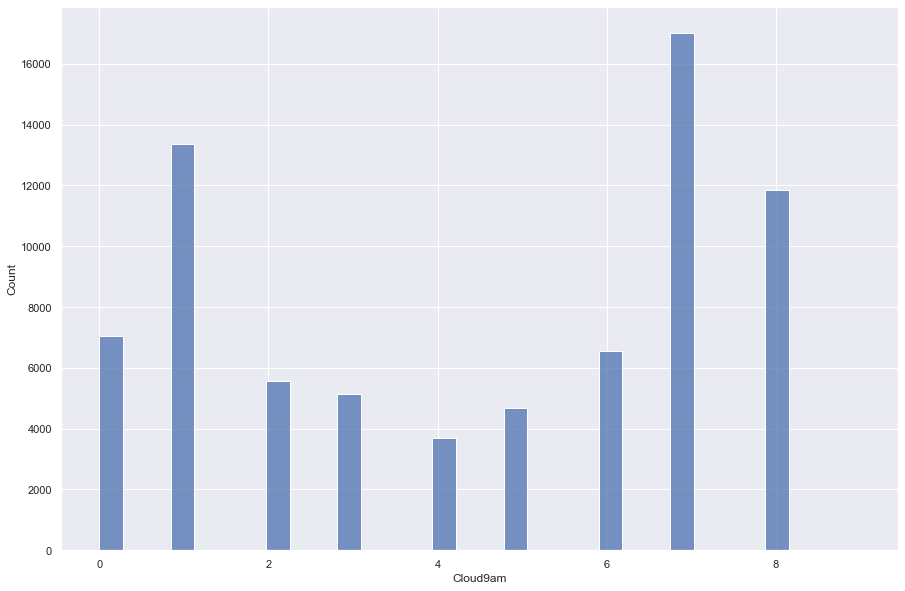

In [160]:
sns.histplot(data=df_copy, x='Cloud9am')

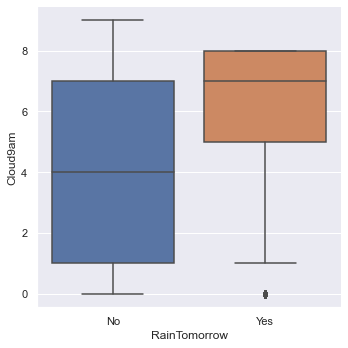

In [161]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Cloud9am', kind='box')

<AxesSubplot:xlabel='Cloud3pm', ylabel='Count'>

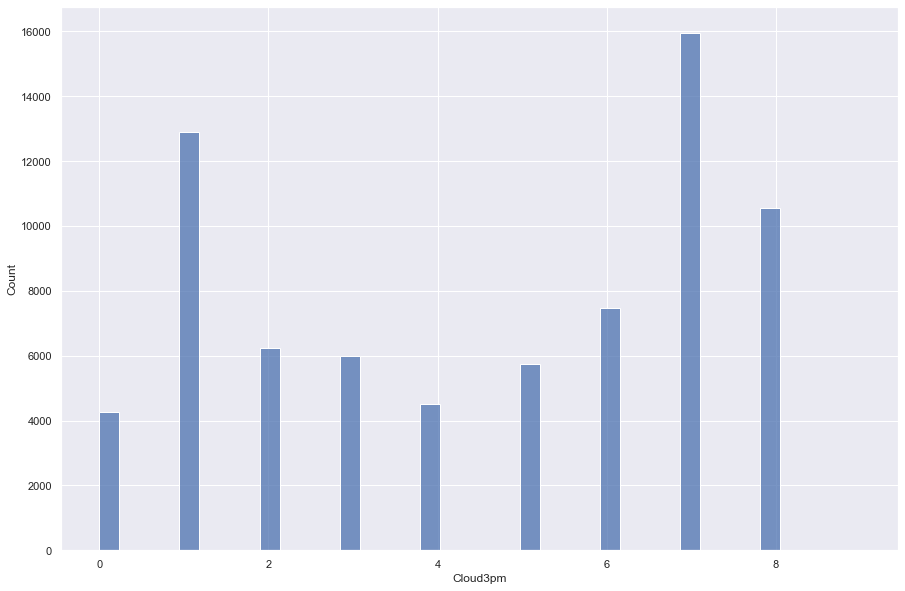

In [162]:
sns.histplot(data=df_copy, x='Cloud3pm')

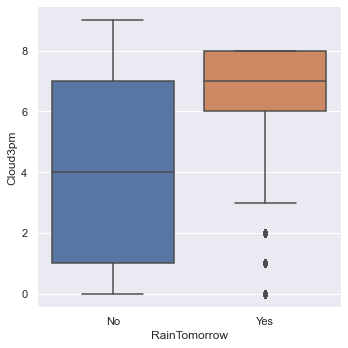

In [163]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Cloud3pm', kind='box')

In [164]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120016 entries, 30 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       120016 non-null  object 
 1   MinTemp        120016 non-null  float64
 2   MaxTemp        120016 non-null  float64
 3   Rainfall       120016 non-null  float64
 4   Sunshine       65193 non-null   float64
 5   WindGustDir    120016 non-null  object 
 6   WindGustSpeed  120016 non-null  float64
 7   WindDir9am     120016 non-null  object 
 8   WindDir3pm     120016 non-null  object 
 9   WindSpeed9am   120016 non-null  float64
 10  WindSpeed3pm   120016 non-null  float64
 11  Humidity9am    120016 non-null  float64
 12  Humidity3pm    120016 non-null  float64
 13  Pressure9am    120016 non-null  float64
 14  Pressure3pm    120016 non-null  float64
 15  Cloud9am       74916 non-null   float64
 16  Cloud3pm       73581 non-null   float64
 17  Temp9am        120016 non-nu

#### Not considering cloud columns for now bcs of missing values

### Temp9am/3pm

<AxesSubplot:xlabel='Temp9am', ylabel='Count'>

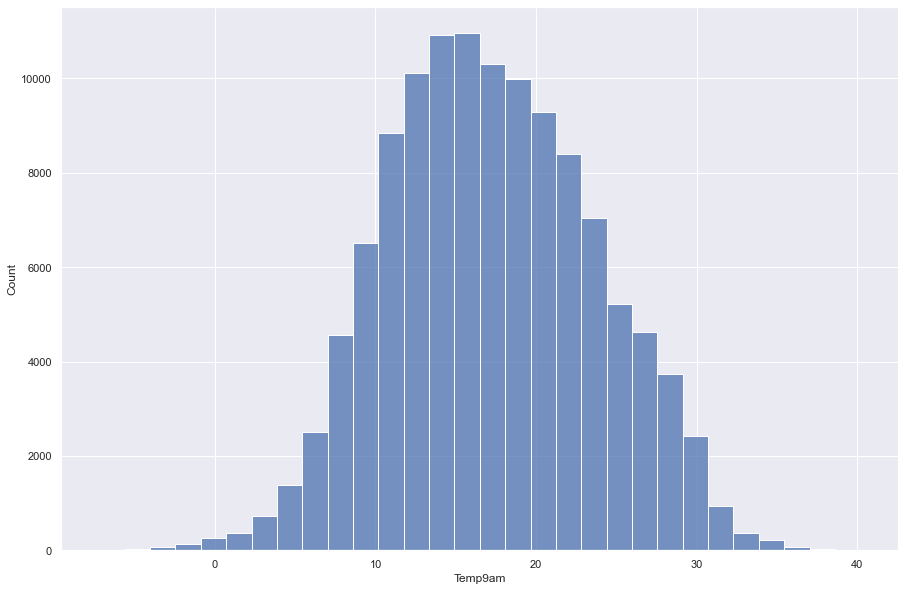

In [165]:
sns.histplot(data=df_copy, x='Temp9am', bins=30)

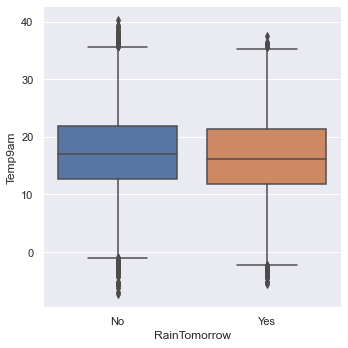

In [166]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Temp9am', kind='box')

<AxesSubplot:xlabel='Temp3pm', ylabel='Count'>

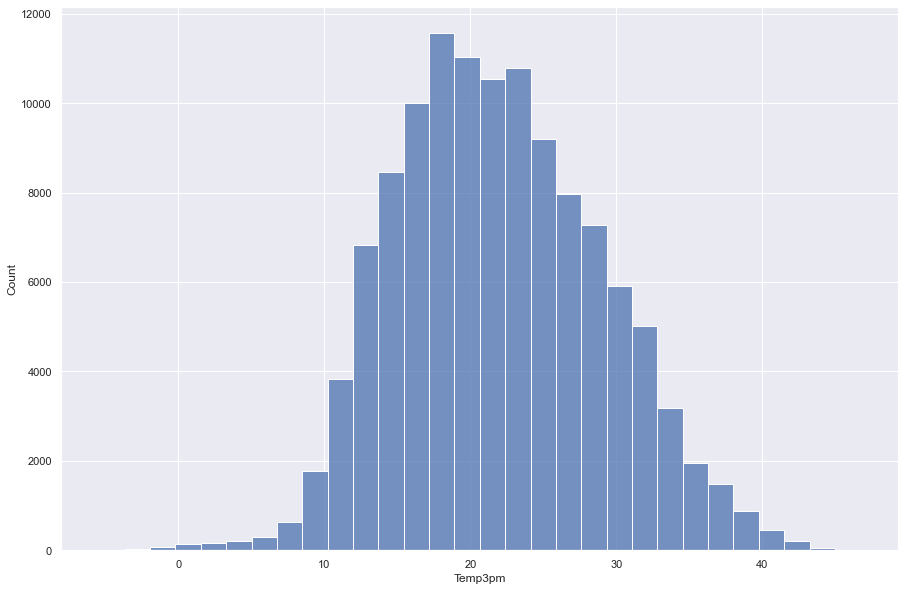

In [167]:
sns.histplot(data=df_copy, x='Temp3pm', bins=30)

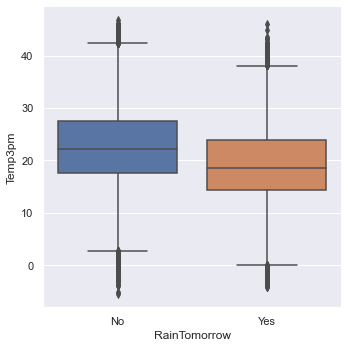

In [168]:
sns.catplot(data=df_copy, x='RainTomorrow', y='Temp3pm', kind='box')

### RISK_MM

In [169]:
df_copy.describe()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
count,120016.000000,120016.000000,120016.000000,65193.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000,74916.000000,73581.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000,120016.000000
mean,12.391379,23.443086,2.357949,7.719544,40.668528,15.041653,19.201648,67.742018,50.854436,1017.458572,1015.084683,4.424195,4.496514,17.219990,21.914747,2.310338,2012.859652,6.387990,15.713280
std,6.329952,7.145401,8.502443,3.780566,13.388251,8.318630,8.590975,19.090525,20.972111,6.750710,6.683852,2.878501,2.720869,6.449757,7.010703,8.428753,2.476476,3.468515,8.787941
min,-8.500000,-4.800000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2009.000000,1.000000,1.000000
25%,7.800000,18.100000,0.000000,5.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1013.300000,1010.800000,1.000000,2.000000,12.500000,16.800000,0.000000,2011.000000,3.000000,8.000000
50%,12.200000,23.000000,0.000000,8.600000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.458572,1015.084683,5.000000,5.000000,16.900000,21.400000,0.000000,2013.000000,6.000000,16.000000
75%,17.000000,28.500000,0.800000,10.700000,48.000000,20.000000,24.000000,82.000000,65.000000,1021.700000,1019.300000,7.000000,7.000000,21.800000,26.800000,0.600000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,367.600000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


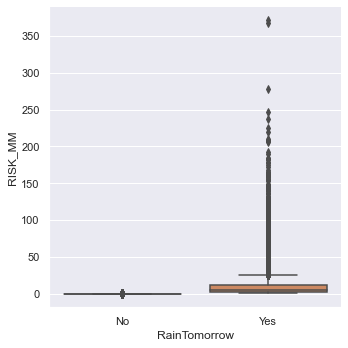

In [170]:
sns.catplot(data=df_copy, x='RainTomorrow', y='RISK_MM', kind='box')

### Dropping RISK_MM

In [171]:
df_copy = df_copy.drop('RISK_MM', axis=1)
df_copy.head()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
30,Albury,11.3,26.5,0.0,NaN,WNW,56.0,W,WNW,19.0,...,1003.2,NaN,NaN,19.7,25.7,No,No,2009,1,1
31,Albury,9.6,23.9,0.0,NaN,W,41.0,WSW,SSW,19.0,...,1013.1,NaN,NaN,14.9,22.1,No,No,2009,1,2
32,Albury,10.5,28.8,0.0,NaN,SSE,26.0,SSE,E,11.0,...,1014.8,NaN,NaN,17.1,26.5,No,No,2009,1,3
33,Albury,12.3,34.6,0.0,NaN,WNW,37.0,SSE,NW,6.0,...,1010.3,NaN,NaN,20.7,33.9,No,No,2009,1,4
34,Albury,12.9,35.8,0.0,NaN,WNW,41.0,ENE,NW,6.0,...,1009.2,NaN,NaN,22.4,34.4,No,No,2009,1,5


In [172]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120016 entries, 30 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       120016 non-null  object 
 1   MinTemp        120016 non-null  float64
 2   MaxTemp        120016 non-null  float64
 3   Rainfall       120016 non-null  float64
 4   Sunshine       65193 non-null   float64
 5   WindGustDir    120016 non-null  object 
 6   WindGustSpeed  120016 non-null  float64
 7   WindDir9am     120016 non-null  object 
 8   WindDir3pm     120016 non-null  object 
 9   WindSpeed9am   120016 non-null  float64
 10  WindSpeed3pm   120016 non-null  float64
 11  Humidity9am    120016 non-null  float64
 12  Humidity3pm    120016 non-null  float64
 13  Pressure9am    120016 non-null  float64
 14  Pressure3pm    120016 non-null  float64
 15  Cloud9am       74916 non-null   float64
 16  Cloud3pm       73581 non-null   float64
 17  Temp9am        120016 non-nu

In [173]:
df_copy_all = df_copy.copy()

In [174]:
df_copy_all.to_csv('df_copy_all.csv', index=False)

### Label encoding

In [175]:
df_copy['RainTomorrow']= LabelEncoder().fit_transform(df_copy['RainTomorrow'])

In [176]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120016 entries, 30 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       120016 non-null  object 
 1   MinTemp        120016 non-null  float64
 2   MaxTemp        120016 non-null  float64
 3   Rainfall       120016 non-null  float64
 4   Sunshine       65193 non-null   float64
 5   WindGustDir    120016 non-null  object 
 6   WindGustSpeed  120016 non-null  float64
 7   WindDir9am     120016 non-null  object 
 8   WindDir3pm     120016 non-null  object 
 9   WindSpeed9am   120016 non-null  float64
 10  WindSpeed3pm   120016 non-null  float64
 11  Humidity9am    120016 non-null  float64
 12  Humidity3pm    120016 non-null  float64
 13  Pressure9am    120016 non-null  float64
 14  Pressure3pm    120016 non-null  float64
 15  Cloud9am       74916 non-null   float64
 16  Cloud3pm       73581 non-null   float64
 17  Temp9am        120016 non-nu

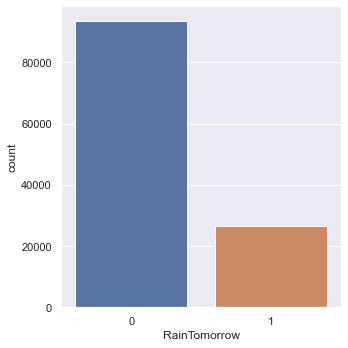

In [177]:
sns.catplot(data=df_copy, x='RainTomorrow', kind='count')

### Dropping 3 columns

In [178]:
df_copy = df_copy.drop(['Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

In [179]:
df_copy.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

## Correlation 

In [180]:
cM = df_copy.corr(method='spearman')

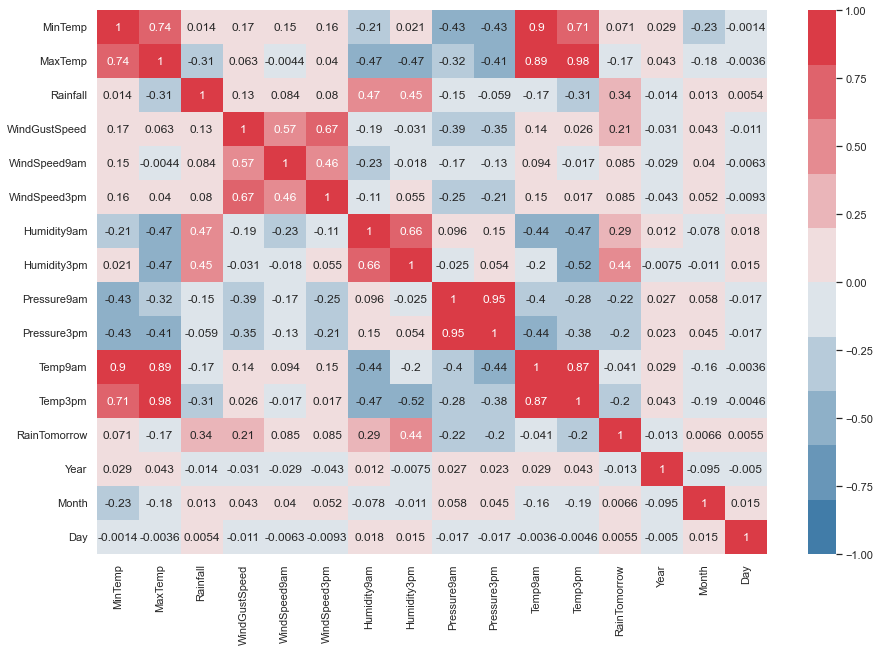

In [181]:
sns.set(rc={'figure.figsize': (15,10)})
color_map = sns.diverging_palette(240,10,n=10)
sns.heatmap(cM, vmin=-1., vmax=1., cmap=color_map, annot=True);

## Categorical data

In [182]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120016 entries, 30 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       120016 non-null  object 
 1   MinTemp        120016 non-null  float64
 2   MaxTemp        120016 non-null  float64
 3   Rainfall       120016 non-null  float64
 4   WindGustDir    120016 non-null  object 
 5   WindGustSpeed  120016 non-null  float64
 6   WindDir9am     120016 non-null  object 
 7   WindDir3pm     120016 non-null  object 
 8   WindSpeed9am   120016 non-null  float64
 9   WindSpeed3pm   120016 non-null  float64
 10  Humidity9am    120016 non-null  float64
 11  Humidity3pm    120016 non-null  float64
 12  Pressure9am    120016 non-null  float64
 13  Pressure3pm    120016 non-null  float64
 14  Temp9am        120016 non-null  float64
 15  Temp3pm        120016 non-null  float64
 16  RainToday      120016 non-null  object 
 17  RainTomorrow   120016 non-nu

In [183]:
df_copy.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
30,Albury,11.3,26.5,0.0,WNW,56.0,W,WNW,19.0,31.0,...,26.0,1004.5,1003.2,19.7,25.7,No,0,2009,1,1
31,Albury,9.6,23.9,0.0,W,41.0,WSW,SSW,19.0,11.0,...,22.0,1014.4,1013.1,14.9,22.1,No,0,2009,1,2
32,Albury,10.5,28.8,0.0,SSE,26.0,SSE,E,11.0,7.0,...,22.0,1018.7,1014.8,17.1,26.5,No,0,2009,1,3
33,Albury,12.3,34.6,0.0,WNW,37.0,SSE,NW,6.0,17.0,...,12.0,1015.1,1010.3,20.7,33.9,No,0,2009,1,4
34,Albury,12.9,35.8,0.0,WNW,41.0,ENE,NW,6.0,26.0,...,9.0,1012.6,1009.2,22.4,34.4,No,0,2009,1,5


### Columns to transform: Location, WindGustDir, WindDir9am, WindDir3pm, RainToday

In [184]:
df_copy = pd.get_dummies(data=df_copy, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [185]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120016 entries, 30 to 142192
Columns: 113 entries, MinTemp to RainToday_Yes
dtypes: float64(12), int32(1), int64(3), uint8(97)
memory usage: 26.2 MB


In [186]:
df_copy.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm',
       ...
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',
       'RainToday_No', 'RainToday_Yes'],
      dtype='object', length=113)

In [187]:
df_copy.to_csv('df_clean.csv', index=False)